In [2]:
import os 
print(os.path.abspath("."))
import torch
import torch.nn
import torchvision
import torchvision.transforms as transforms
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline
import time 
import sys
import pandas as pd
import numpy as np
import torchvision.utils
import torchvision.datasets as Datasets

/content


In [3]:
mnist_train = Datasets.FashionMNIST(root='./Datasets/FashionMNIST',train=True,download=True,transform=transforms.ToTensor())
mnist_test = Datasets.FashionMNIST(root='./Datasets/FashionMNIST',train=True,download=True,transform=transforms.ToTensor())

In [4]:
import torch.nn as nn
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=True)
nums_inputs = 28*28
nums_outputs = 10
class LinearNet(nn.Module):
  def __init__(self):
    super(LinearNet,self).__init__()
    self.linear=nn.Linear(nums_inputs,nums_outputs)
  def forward(self,x):# x shape: (batch, 1, 28, 28)
    y = self.linear(x.view(x.shape[0],-1))
    return y

In [5]:
net = nn.Sequential(LinearNet())
print(net[0])

LinearNet(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [6]:
from torch.nn import init
init.normal_(net[0].linear.weight,mean=0,std=0.01)
init.constant_(net[0].linear.bias,val=0)

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [7]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(),lr=0.01)
num_epochs = 10
def train (net,train_iter,loss,num_epochs,optimizer):
  for epoch in range(num_epochs):
    train_l_sum,train_acc_sum,n=0.0,0.0,0
    for X,y in train_iter:
      y_hat = net(X)
      l = loss(y_hat,y)
      optimizer.zero_grad()
      l.backward()
      optimizer.step()
      train_l_sum+=l.item()
      train_acc_sum += (y_hat.argmax(dim=1)==y).sum().item()
      n+=y.shape[0]
    print('epoch %d, loss %.4f, train acc %.3f,'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n))  

train(net,train_iter,loss,num_epochs,optimizer)



epoch 1, loss 0.0053, train acc 0.642,
epoch 2, loss 0.0036, train acc 0.716,
epoch 3, loss 0.0031, train acc 0.750,
epoch 4, loss 0.0029, train acc 0.767,
epoch 5, loss 0.0028, train acc 0.780,
epoch 6, loss 0.0026, train acc 0.789,
epoch 7, loss 0.0026, train acc 0.795,
epoch 8, loss 0.0025, train acc 0.800,
epoch 9, loss 0.0024, train acc 0.803,
epoch 10, loss 0.0024, train acc 0.807,


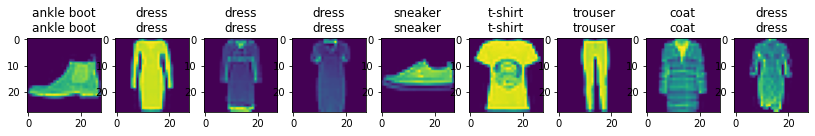

In [9]:
X, y = iter(test_iter).next()

def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]
    
def show_fashion_mnist(images,labels):
  figs,ax = plt.subplots(nrows=1,ncols=len(images),figsize=(14,14))
  for f,img,lbl in zip(ax,images,labels):
    f.imshow(img.reshape(28,28).numpy())
    f.set_title(lbl)
  plt.show()

true_labels = get_fashion_mnist_labels(y.numpy())
pred_labels = get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

show_fashion_mnist(X[0:9], titles[0:9])